<a href="https://colab.research.google.com/github/Immaczx/ModeladoySimulacion/blob/main/Trabajo_ModeladoYSimulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas caóticos y revisión de su usabilidad a la generación caótica de números aleatorios.

Camilo Pelaz Garcia.

# 1. Resumen

Este trabajo trata de replicar algunos estudios hechos en  [[1]](https://www.researchgate.net/profile/Michal-Pluhacek/publication/324087299_Chaos-Based_Optimization_-_A_Review/links/5ac23a440f7e9bfc045e52fc/Chaos-Based-Optimization-A-Review.pdf) donde se analiza el potencial que tienen diferentes sistemas caóticos, en los campos del mapeo dinámico del espacio de búsqueda y la generación caótica de números pseudo-aleatorios. En este trabajo se simulan diferentes sistemas caoticos. Como lo son, los flujos continuos(Sistema lorenz, Sistema Roosler, Oscilador de Van der Pol, Oscilador UEDA) y los mapas caotios(Mapa Arnold's Cat, Mapa Dissipative Standard, Mapa Lozi, Mapa Ikeda, Mapa Sinai, Mapa Burgers, Mapa Tinkerbell). Estos se usan como generadores caoticos de numeros psudo-aleatorios. se discute sobre las distrubuciones otenidas y cuales resultan mas interesantes para el uso general. Se concluye que los mapas caoticos al ser mas simples de simular. Ademas, que entre ellos se encuntran distribuciones uniformes que son mas llamativas para la generacion de numeros pseudo-aleatorios.

### Palabras clave: Sistemas caóticos en tiempo continuo, Mapas caóticos discretos, Generador caótico de números pseudo-aleatorios.

# 2. Introducción

De manera general el "caos" abarca cualquier fenómeno determinista que no se pueda predecir. Estos fenómenos tienen su propia rama de estudio y análisis, no tienen presencia de un efecto aleatorio o estocástico al que se le atribuya su comportamiento no predecible, como se mostrará en las ecuaciones de este notebook. Esta aparente aleatoriedad en el caos determinista se atribuye a una extrema sensibilidad a las condiciones iniciales [2].

El caos se ha evidenciado en varios procesos deterministas como lo son el clima, los sistemas biológicos (incluido el evolutivo), muchos circuitos electrónicos (circuito de Chua, oscilador de Vander Pol), sistemas mecánicos (péndulo doble, péndulo magnético, problema del billar). El uso de sistemas caóticos como remplazo a (generadores de pseudo-números - PRNG) se ha presentado en diferentes campos de investigación y aplicaciones con resultados prometedores.[3], [4].


El artículo [5], investiga profundamente el uso de un mapa logístico como posible generador números pseudoaleatorios y se compara el contemporáneo con generadores de números pseudoaleatorios. Se realiza una comparación de los resultados del mapa logístico con los métodos convencionales de generación pseudoaleatoria.

# 3. Motivación

El caos determinista se ha utilizado como un remplazo a los generadores de números pseudo-aleatorios (PRGN) (para distribuciones uniformes en su mayoría) en algoritmos metaheurísticos o para el mapeo simple de soluciones.

El principal objetivo del trabajo es observar, analizar y comparar la implementación de diferentes dinámicas caóticas y las distribuciones de números pseudo-aleatorios.  Se aporta una discusión sobre la usabilidad de los sistemas caóticos estudiados como CPRNG (Caotic pseudo-ramdon  generator), para el mapeo simple de soluciones.

## 4. Sistemas en tiempo continuo para CPRNG

En esta sección se exploran los sistemas caóticos continuos en el tiempo, mediante diagramas de bifurcaciones para ubicar los sistemas en la dinámica caótica. También se abre la posibilidad de explorar los cambios de las distribuciones de la generación de números aleatorios para ponerlos en otras secciones que tengan caos en el mismo sistema.

Para todos los sistemas caóticos se simulan 500 Segundos con un paso de 0.05 segundos dando unos 10.000 datos muestreados a una frecuencia de 20 Hz. Los histogramas están compuestos por todos los datos de la simulación, sin embargo, las figuras de las simulaciones están usando los últimos 4000 datos para reducir la escala de tiempo que se muestra y para eliminar el transitorio de la simulación. 

### 4.1 El Sistema de Lorenz

Este sistema tiene flujo dinámico tridimensional, que exhibe un comportamiento caótico. Fue introducido en 1963 por Edward Lorenz, quien lo derivó de las ecuaciones simplificadas de los rodillos de convección que surgen en las ecuaciones de la atmósfera.

$\frac{dx}{dt} = -a(x - y)$

$\frac{dy}{dt} = x(b - z) - y$

$\frac{dz}{dt} = xy-z$

Se fija el valor de $a$ = 3.0 para variar el parámetro $b$ y generar el diagrama de bifurcaciones. El flujo caótico se simula con $a$ = 3.0 y $b$ = 26.5.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


time= 2873.709691


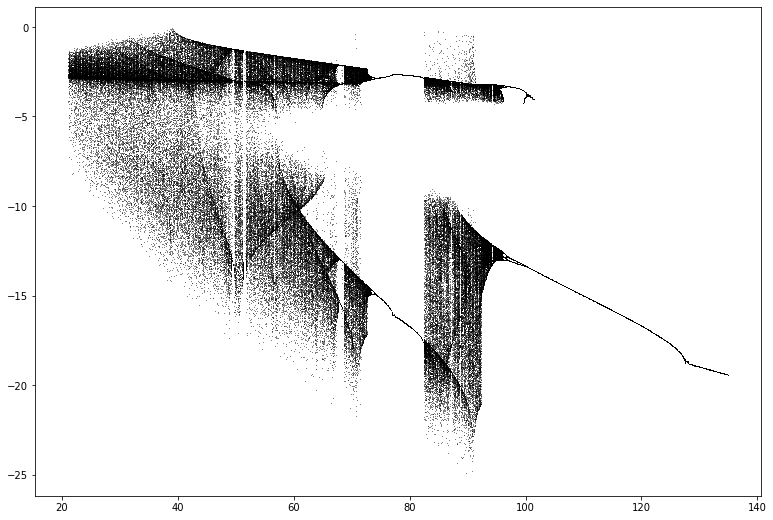

In [ ]:
"""
Program to plot lorenz system bifurcation diagram
"""

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time


def lorenz (t,xyz,a,b):
  x,y,z = xyz
  return [-a*(x-y),x*(b-z)-y,x*y-z]

def event_lorenz (t,xyz,a,b):
  x,y,z = xyz
  return x+y + 4
# event_lorenz.terminal=True
event_lorenz.direction=-1
fig = plt.figure(figsize=(13,9))
a,b=0,500
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]
tic=time.clock()
for r in np.arange(15,135,0.1):
  sol=solve_ivp(lorenz,[a,b],y0,args=(3.0,r),t_eval=t,events=event_lorenz,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],',k', alpha=0.5)
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

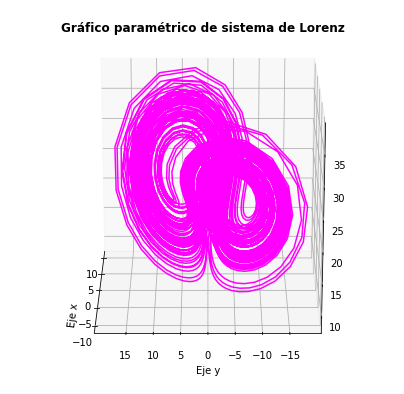

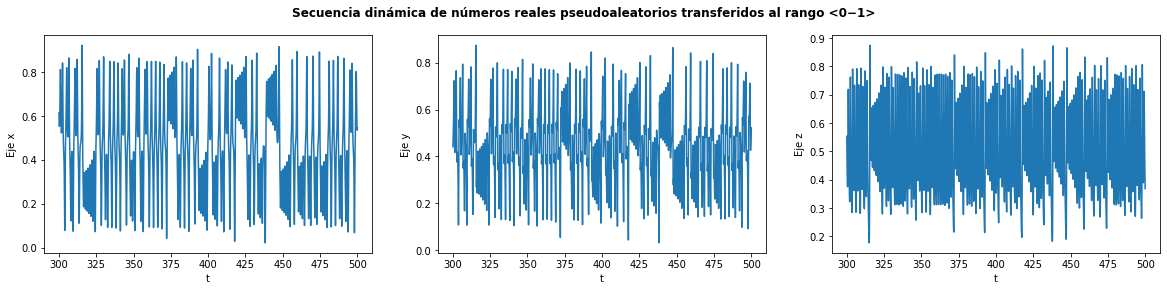

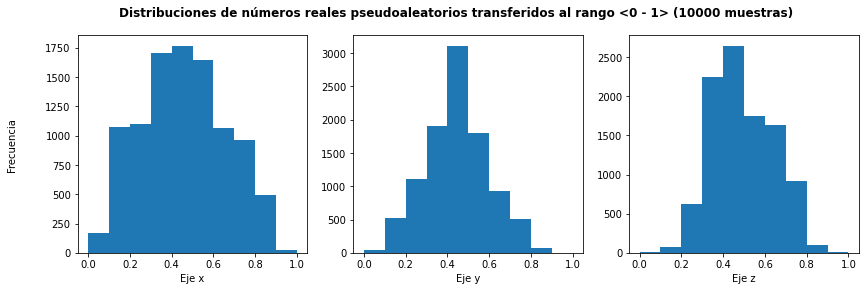

In [ ]:
"""
Program to plot lorenz system
"""

def lorenz (t,xyz,a,b):
  x,y,z = xyz
  return [-a*(x-y),x*(b-z)-y,x*y-z]

# a,b = 3.0,26.5
# numerical integration
a,b=0,500
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]

sol=solve_ivp(lorenz,[a,b],y0,args=(3.0,26),t_eval=t,rtol=1e-4,atol=1e-7)
x,y,z = sol.y
# figure 3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.view_init(20, 180)
# ax.set_axis_off()
ax.plot(x[-4000:],y[-4000:],z[-4000:],'magenta')
plt.title("Gráfico paramétrico de sistema de Lorenz", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
z_norm = (z -z.min())/(z.max()-z.min())
fig = plt.figure(figsize=(20,4))
plt.subplot(131)
plt.plot(sol.t[-4000:], x_norm[-4000:])
plt.ylabel('Eje x')
plt.xlabel('t')
plt.subplot(132)
plt.plot(sol.t[-4000:], y_norm[-4000:])
plt.ylabel('Eje y')
plt.xlabel('t')
plt.subplot(133)
plt.plot(sol.t[-4000:], z_norm[-4000:])
plt.ylabel('Eje z')
plt.xlabel('t')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(14,4))
plt.subplot(131)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(132)
plt.hist(y_norm)
plt.xlabel('Eje y')
plt.subplot(133)
plt.hist(z_norm)
plt.xlabel('Eje z')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El sistemas de Lorenz presenta una órbita caótica densa, principalmente en el plano $x,y$. Aunque limitada al pensar en un mapeo en el espacio de búsqueda. En las secuencias dinámicas se observan oscilaciones tanto en el en el plano superior a 5, como en el plano inferior a este para los ejes $x$ y $y$. Esto es interesante y hace pensar en una distribución uniforme o atípica, sin embargo, al remitirse a las figuras de las distribuciones, se encuentra una tendencia a la probabilidad en los tres ejes.

### 4.2 El sistema de rossler

Exhibe una dinámica caótica asociada con las propiedades fractales del atractor. Originalmente se introdujo como un ejemplo de flujo caótico muy simple que contiene caos de manera similar al atractor de Lorenz. Este atractor tiene algunas similitudes con el de Lorenz, pero es más simple.

$\frac{dx}{dt} = - y - z$

$\frac{dy}{dt} = x + ay$

$\frac{dz}{dt} =  b + z(x - c)$

Para este sistema se fijan los valores de $a$ = 0.2 y $c$ = 5.7 para variar el parámetro $b$ y generar el diagrama de bifurcaciones. El flujo caótico se simula con $a$ = 0.2,  $b$ = 0.2 y $c$ = 5.7.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


time= 1314.544887


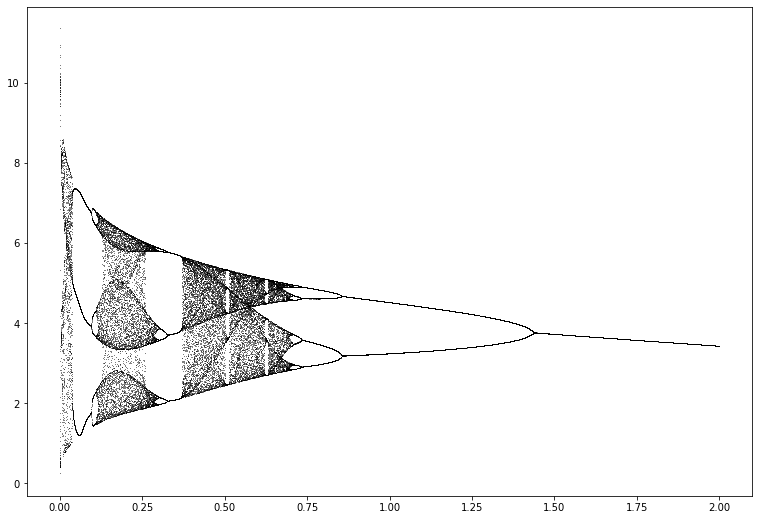

In [ ]:
"""
Program to plot Rossler system bifurcation diagram
"""

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

def Rossler (t,xyz,a,b,c):
  x,y,z=xyz
  return [-y-z, x+a*y, b+z*(x-c)]

def event_Rossler (t,xyz,a,b,c):
  x,y,z=xyz
  return x+y
# event_lorenz.terminal=True
event_Rossler.direction=-1
fig = plt.figure(figsize=(13,9))
a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]
tic=time.clock()
for r in np.arange(0,2,0.0001):
  sol=solve_ivp(Rossler,[a,b],y0,args=(0.2,r,5.7),t_eval=t,events=event_Rossler,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],',k', alpha=.5)
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

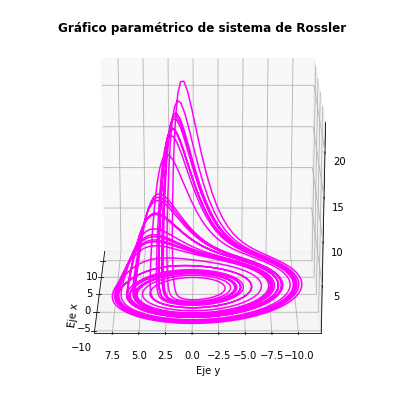

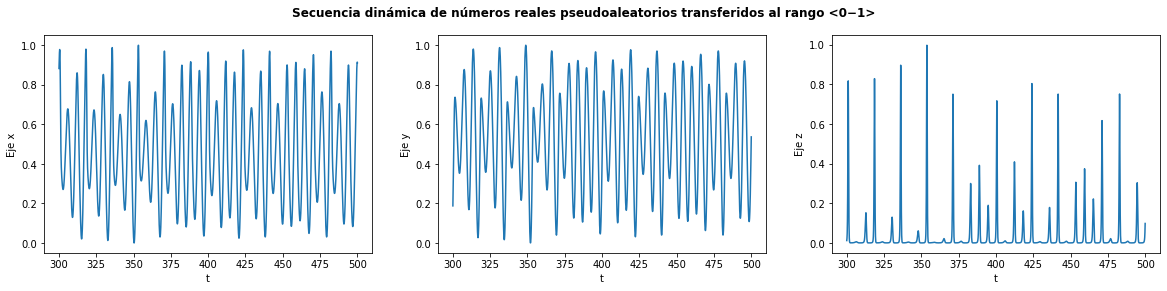

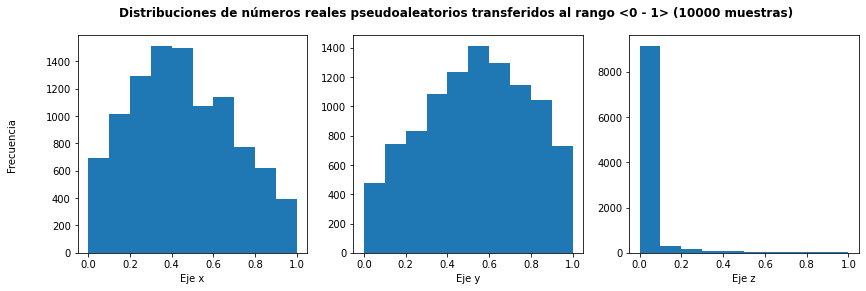

In [ ]:
"""
Program to plot Rossler system
"""

def Rossler (t,xyz,a,b,c):
  x,y,z=xyz
  return [-y-z, x+a*y, b+z*(x-c)]


# a,b,c= 0.2,0.2,5.7

# numerical integration
a,b=0,500
t= np.linspace(a,b,10000)
y0=[0.1,0.1,0.1]

sol=solve_ivp(Rossler,[a,b],y0,args=(0.2,0.2,5.7),t_eval=t,rtol=1e-4,atol=1e-7)
x,y,z = sol.y
# figure 3D
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.view_init(20, 180)
# ax.set_axis_off()
ax.plot(x[-4000:],y[-4000:],z[-4000:],'magenta')
plt.title("Gráfico paramétrico de sistema de Rossler", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
z_norm = (z -z.min())/(z.max()-z.min())
fig = plt.figure(figsize=(20,4))
plt.subplot(131)
plt.plot(sol.t[-4000:], x_norm[-4000:])
plt.ylabel('Eje x')
plt.xlabel('t')
plt.subplot(132)
plt.plot(sol.t[-4000:], y_norm[-4000:])
plt.ylabel('Eje y')
plt.xlabel('t')
plt.subplot(133)
plt.plot(sol.t[-4000:], z_norm[-4000:])
plt.ylabel('Eje z')
plt.xlabel('t')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(14,4))
plt.subplot(131)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(132)
plt.hist(y_norm)
plt.xlabel('Eje y')
plt.subplot(133)
plt.hist(z_norm)
plt.xlabel('Eje z')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El sistema de Rossler padece el mismo problema que el sistema de Lorenz, a pesar de que su órbita es densa esta sigue siendo limitada y al ver las secuencias dinámicas sobresale la correspondiente al eje $z$ la cual permanece en valores muy cercanos a cero. Cuando se observan las distribuciones correspondientes al eje $x$ y $y$ presenta un comportamiento más uniforme que las distribuciones obtenidas del modelo de Lorenz, pero aun así son similares.

### 4.3 El oscilador de Van der Pol 

Es el ejemplo simple de los ciclos límite y el comportamiento caótico en los circuitos eléctricos que emplean tubos de vacío. Se puede utilizar para explorar el comportamiento físico (inestable) en las ciencias biológicas.

$\frac{dx}{dt} = y$ 

$\frac{dy}{dt} = \mu (1 - \gamma x^2) y - x^3 + a sin(\omega t)$

Se fijan los valores de $\mu$ = 0.2, $\gamma$ = 8.0 y $a$ = 0.35 para variar el parámetro $\omega$ y generar el diagrama de bifurcaciones. El flujo caótico se simula con $\mu$ = 0.2, $\gamma$ = 8.0, $a$ = 0.35 y $\omega$ = 1.02.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


time= 1162.412371


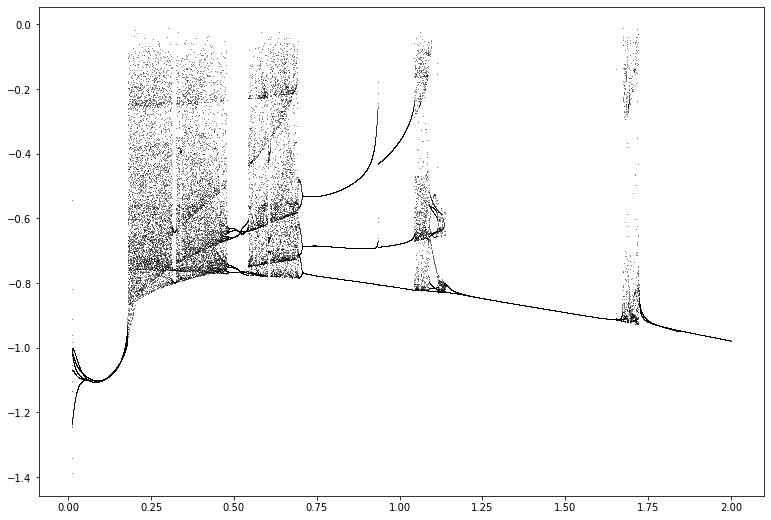

In [ ]:
"""
Program to plot Van der Pol oscillator bifurcation diagram
"""

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

def Van_der_Pol (t,xy,mu,gamma,a,W):
  x,y=xy
  return [y, mu*(1-gamma*x**2)*y -x**3 +a*np.sin(W*t)]

def event_Van_der_Pol (t,xy,mu,gamma,a,W):
  x,y=xy
  return x
# event_lorenz.terminal=True
event_Van_der_Pol.direction=-1
fig = plt.figure(figsize=(13,9))
a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1]
tic=time.clock()
for r in np.arange(0.01,2,0.0001):
  sol=solve_ivp(Van_der_Pol,[a,b],y0,args=(r,8.0,0.35,1.02),t_eval=t,events=event_Van_der_Pol,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],',k', alpha=.5)
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

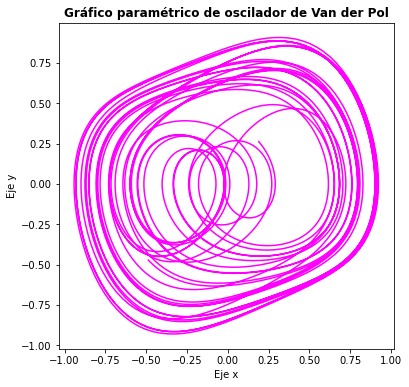

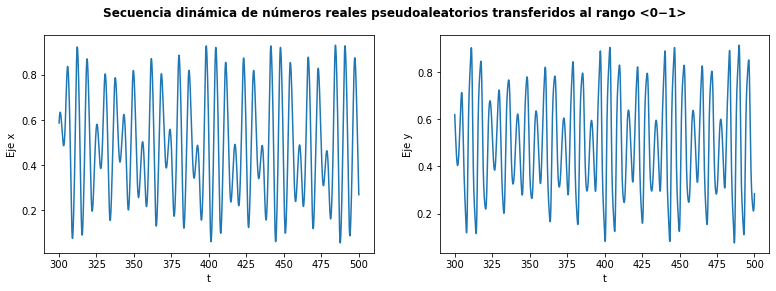

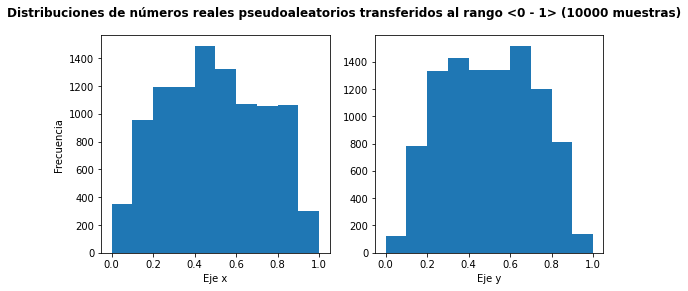

In [ ]:
"""
Program to plot Van der Pol oscillator
"""

def Van_der_Pol (t,xy,mu,gamma,a,W):
  x,y=xy
  return [y, mu*(1-gamma*x**2)*y -x**3 +a*np.sin(W*t)]

# mu,gamma,a,W = 0.2,8.0,0.35,1.02

# numerical integration
a,b=0,500
t= np.linspace(a,b,10000)
y0=[0.1,0.1]

sol=solve_ivp(Van_der_Pol,[a,b],y0,args=(0.2,8.0,0.35,1.02),t_eval=t,rtol=1e-4,atol=1e-7)
x,y = sol.y
# figure 3D
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
# ax.view_init(90, 180)
# ax.set_axis_off()
ax.plot(x[-4000:],y[-4000:],'magenta')
plt.title("Gráfico paramétrico de oscilador de Van der Pol", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(sol.t[-4000:], x_norm[-4000:])
plt.ylabel('Eje x')
plt.xlabel('t')
plt.subplot(122)
plt.plot(sol.t[-4000:], y_norm[-4000:])
plt.ylabel('Eje y')
plt.xlabel('t')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El oscilador Vander Pol no cuenta con un atractor caótico denso y tampoco amplio. Lo mas interesante en este modelos son las secuencias de dinámicas, ya que tienen un comportamiento que al mirar a simple vista se diría periódico pero es cambiante y en la parte de distribuciones se observa una tendencia a la simetría.

### 4.4 El oscilador UEDA 

Este es un ejemplo simple de péndulos impulsados, que representan algunos de los ejemplos más significativos de caos y regularidad. El oscilador UEDA representa el modelo dinámico tanto biológica como físicamente relevante que exhibe un movimiento caótico.

$\frac{dx}{dt} = y$ 

$\frac{dy}{dt} = - ax^3 - by + c sin(\omega t)$ 

Se fijan los valores de $a$ = 1.0, $b$ = 0.05 y $c$ = 7.5 para variar el parámetro $\omega$ y generar el diagrama de bifurcaciones. El flujo caótico se simula con $a$ = 1.0, $b$ = 0.05, $c$ = 7.5 y $\omega$ = 1.0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


time= 179.586826


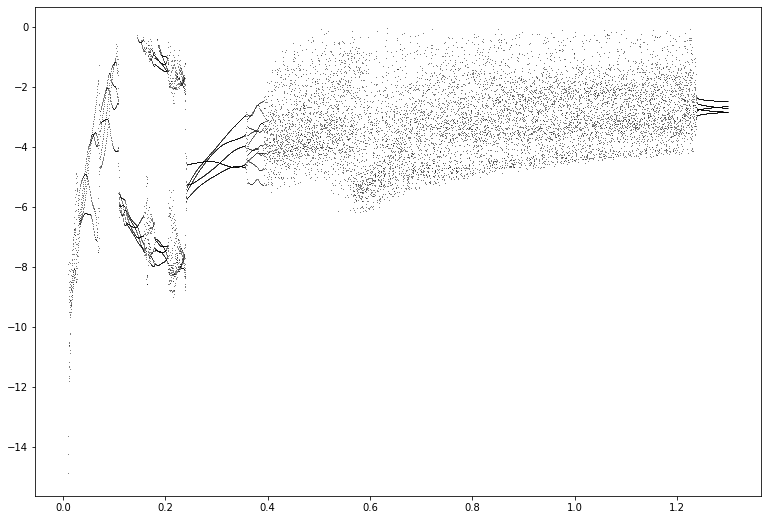

In [ ]:
"""
Program to plot UEDA oscillator bifurcation diagram
"""

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

def UEDA (t,xy,a,b,c,W):
  x,y=xy
  return [y, -a*x**3 -b*y +c*np.sin(W*t)]

def event_UEDA (t,xy,a,b,c,W):
  x,y=xy
  return x
# event_lorenz.terminal=True
event_UEDA.direction=-1
fig = plt.figure(figsize=(13,9))
a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.1,0.1]
tic=time.clock()
for r in np.arange(0.01,1.3,0.0005):
  sol=solve_ivp(UEDA,[a,b],y0,args=(r,0.05,7.5,1.0),t_eval=t,events=event_UEDA,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],',k', alpha=.5)
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

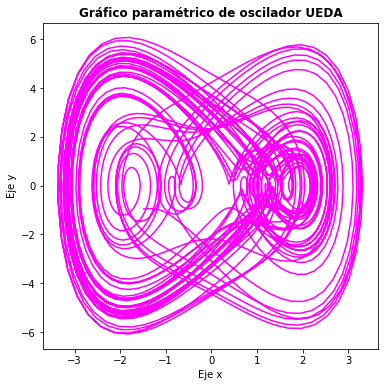

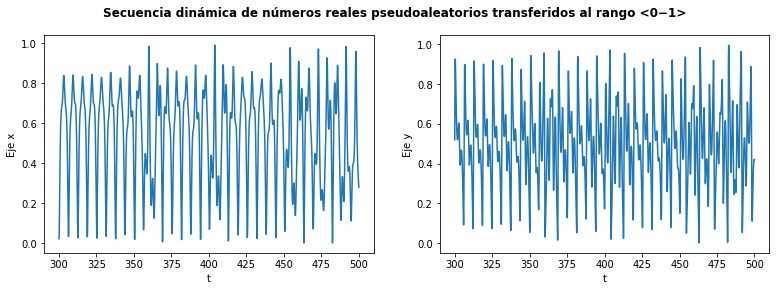

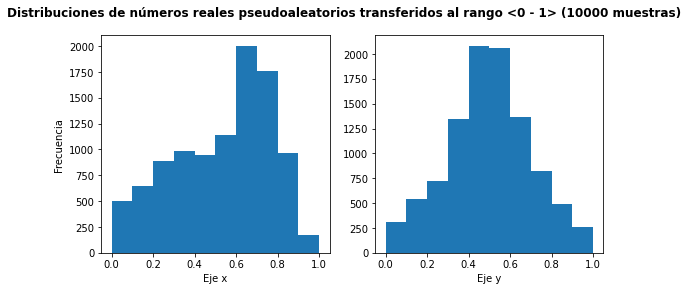

In [ ]:
"""
Program to plot UEDA oscillator
"""

def UEDA (t,xy,a,b,c,W):
  x,y=xy
  return [y, -a*x**3 -b*y +c*np.sin(W*t)]

# a,b,c,W = 1.0,0.05,7.5,1.0

# numerical integration
a,b=0,500
t= np.linspace(a,b,10000)
y0=[0.1,0.1]

sol=solve_ivp(UEDA,[a,b],y0,args=(1.0,0.05,7.5,1.0),t_eval=t,rtol=1e-4,atol=1e-7)
x,y = sol.y
# figure 3D
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
# ax.view_init(90, 180)
# ax.set_axis_off()
ax.plot(x[-4000:],y[-4000:],'magenta')
plt.title("Gráfico paramétrico de oscilador UEDA", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(sol.t[-4000:], x_norm[-4000:])
plt.ylabel('Eje x')
plt.xlabel('t')
plt.subplot(122)
plt.plot(sol.t[-4000:], y_norm[-4000:])
plt.ylabel('Eje y')
plt.xlabel('t')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El oscilador UEDA es el mas interesante de los sistemas continuos para el mapeo de búsqueda, ya que este es el mas amplio de los estudiados y cuenta con un atractor caótico denso. Las secuencias dinámicas se asemejan a las del oscilador de Vander Pol lo que las hace igualmente interesantes. La distribución del eje $y$ es similar a las de Vander Pol en su tendencia simétrica.

## 5. Mapas caóticos para CPRNG

Los modelos de los mapas caóticos se obtuvieron de la sección 5.12 de  [6]. Estos son la opción usada de modelos caóticos para la generación de números aleatorios. La simulación de los mapas caóticos se hizo con 10000 iteraciones para que los histogramas fueran comparables con los mostrados en la sección anterior "Sistemas en tiempo continuo para CPRNG". las simulaciones están hechas con 2000 datos para ver un poco mejor el comportamiento de estos fenómenos en el tiempo.

In [ ]:
# scientific libraries
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp
import random as rand
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import time

def plot_map(G,n):
  x = np.zeros(n)
  y = np.zeros(n)
  x[0] = rand.random()
  y[0] = rand.random()
  for i in range(n-1):
    x[i+1],y[i+1] = G(x[i],y[i])
  return x,y

### 5.1 Mapa Arnold's Cat


$X_{n+1} = X_{n} + Y_{n}(mod1) $

$Y_{n+1} = X_{n} + k Y_{n}(mod1) $

Se simula con el parametro de $k$ = 2.0.

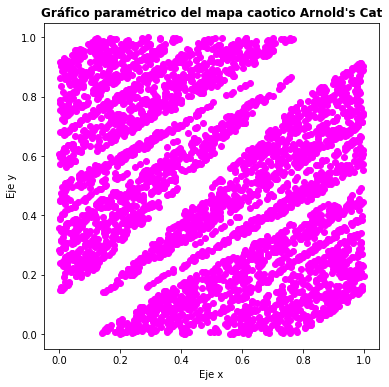

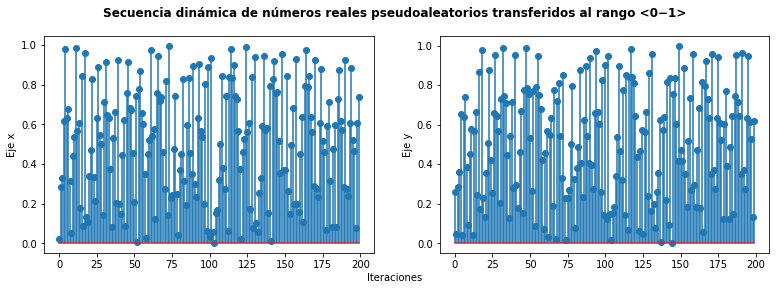

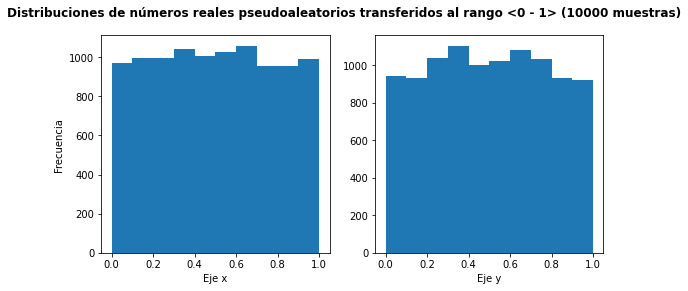

In [ ]:
"""
Program to plot Arnold's Cat map
"""

k = 2
def Arnolds_Cat(X,Y,k = 0.1):
  Xap = (X + Y)%(1)
  Yap = (X + k * Y)%(1) 
  return Xap, Yap

x,y=plot_map(Arnolds_Cat,10000)
fig = plt.figure(figsize=(6,6))
plt.scatter(x[-4000:],y[-4000:],c='magenta')  
plt.title("Gráfico paramétrico del mapa caotico Arnold's Cat", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.stem(x_norm[-200:],use_line_collection=True)
plt.ylabel('Eje x')
plt.subplot(122)
plt.stem(y_norm[-200:], use_line_collection=True)
plt.ylabel('Eje y')
fig.text(0.5, 0.04, 'Iteraciones', ha='center', va='center')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El mapa caótico Arnold's Cat es bastante amplio y denso haciéndolo muy interesante a la hora de mapeo al espacio de búsqueda. Las distribuciones también son muy interesantes ya que se asemejan a la distribución uniforme.

### 5.2 Mapa Dissipative Standard

$X_{n+1} = X_{n} + Y_{n}(mod 2 \pi) $

$Y_{n+1} = b Y_{n} + k sin(X_{n})(mod 2 \pi) $

Se simula con el parametro de $b$ = 0.6 y $k$ = 8.8.

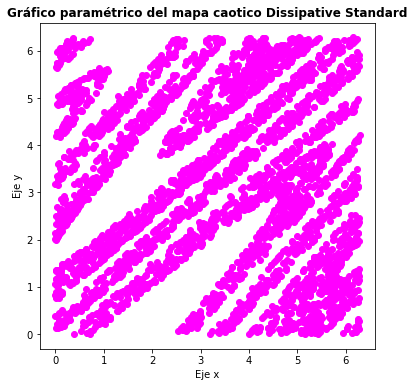

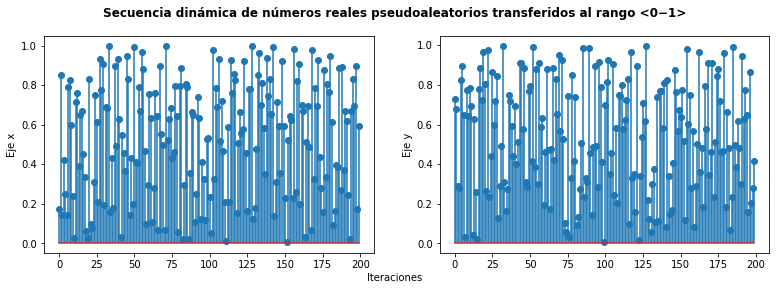

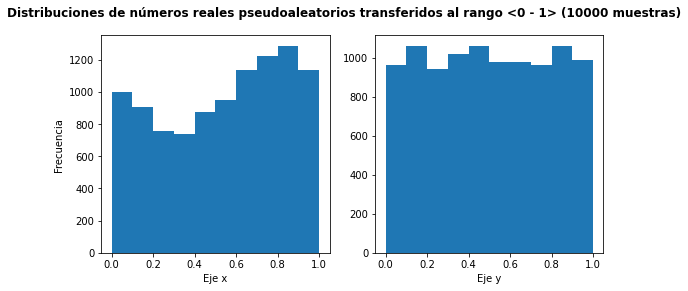

In [ ]:
"""
Program to plot Dissipative standard map
"""

b = 0.6
k = 8.8

def Dissipative_standard(X,Y,b = 0.6,k = 8.8):
  Yap = (b*Y + k*np.sin(X))%(2*np.pi)
  Xap = (X + Yap)%(2*np.pi)
  return Xap, Yap
x,y=plot_map(Dissipative_standard,10000)
fig = plt.figure(figsize=(6,6))
plt.scatter(x[-4000:],y[-4000:],c='magenta')  
plt.title("Gráfico paramétrico del mapa caotico Dissipative Standard", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.stem(x_norm[-200:], use_line_collection=True)
plt.ylabel('Eje x')
plt.subplot(122)
plt.stem(y_norm[-200:], use_line_collection=True)
plt.ylabel('Eje y')
fig.text(0.5, 0.04, 'Iteraciones', ha='center', va='center')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El mapa Dissipative Standard es denso y amplio no tanto como el anterior pero tiene un alto margen de cobertura. haciéndolo igualmente interesante para la opción del mapeo al espacio de búsqueda, en el análisis de la distribución se hace muy interesante la distribución del eje y que como en el caso anterior tiene una tendencia uniforme, en cuanto al eje x es una distribución inusual.

### 5.3 Mapa Lozi 

$X_{n+1} = 1 - a |X_{n}| + b Y_{n} $

$Y_{n+1} = X_{n} $

Se simula con el parametro de $a$ = 1.7 y $b$ = 0.5.

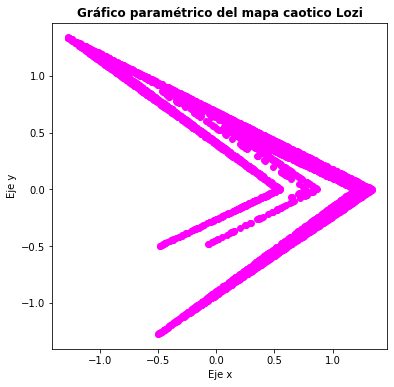

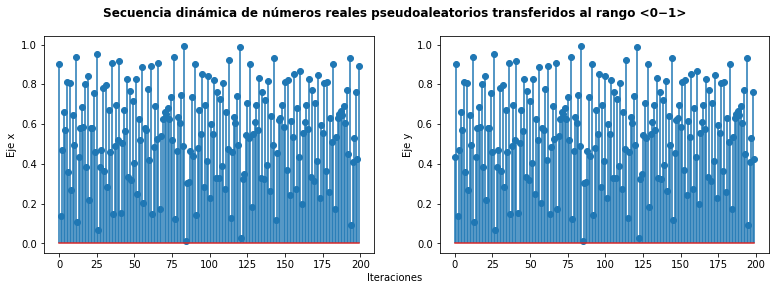

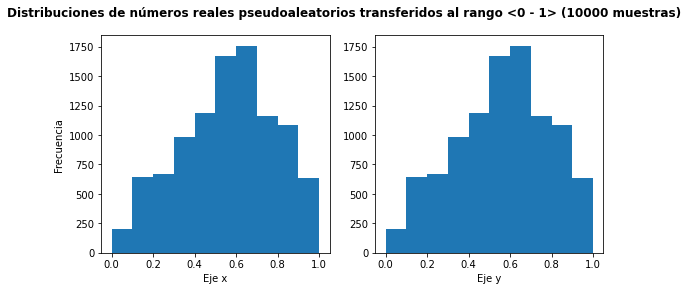

In [ ]:
"""
Program to plot Lozi map
"""

a = 1.7 
b = 0.5
def Lozi(X,Y,a = 1.7,b = 0.5):
  Xap = 1 - a*np.abs(X) + b*Y
  Yap = X
  return Xap, Yap
x,y=plot_map(Lozi,10000)
fig = plt.figure(figsize=(6,6))
plt.scatter(x[-4000:],y[-4000:],c='magenta')  
plt.title("Gráfico paramétrico del mapa caotico Lozi", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.stem(x_norm[-200:], use_line_collection=True)
plt.ylabel('Eje x')
plt.subplot(122)
plt.stem(y_norm[-200:], use_line_collection=True)
plt.ylabel('Eje y')
fig.text(0.5, 0.04, 'Iteraciones', ha='center', va='center')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El mapa Lozi no es amplio ni denso haciéndolo insuficiente para el mapeo al espacio de búsqueda y sus distribuciones se asemejan a las generadas por los mapas continuos.

### 5.4 Mapa Ikeda

$X_{n+1} = \gamma + \mu (X_{n} cos(\phi) - Y_{n} sin(\phi)) $

$Y_{n+1} = \mu (X_{n} sin(\phi) + Y_{n} cos(\phi)) $

$ \phi = b - a/(1 + X_{n}^2 + Y_{n}^2)$

Se simula con el parametro de $a$ = 6.0, $b$ = 0.4, $\gamma$ = 1.0 y $\mu$ = 0.9.

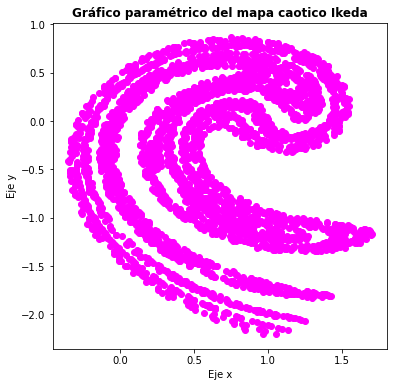

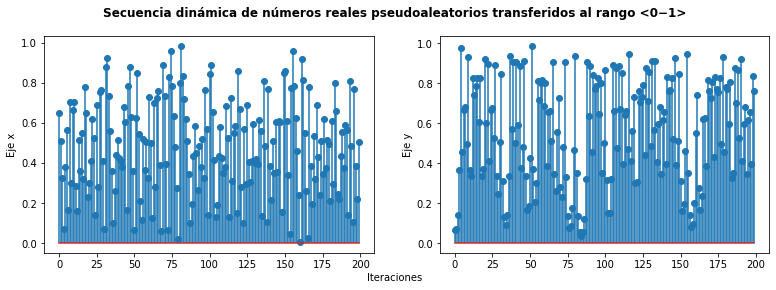

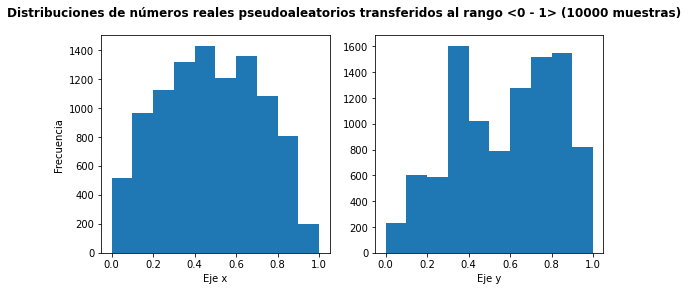

In [ ]:
"""
Program to plot Ikeda map
"""
a = 6
b = 0.4
gamma = 1
mu = 0.9

def Ikeda(X,Y,a = 6,b = 0.4,gamma = 1,mu = 0.9):
  phi = b - (a)/(1 + X**2 + Y**2)
  Xap = gamma + mu*(X*np.cos(phi) - Y*np.sin(phi))
  Yap = mu*(X*np.sin(phi) + Y*np.cos(phi))
  return Xap, Yap
x,y=plot_map(Ikeda,10000)
fig = plt.figure(figsize=(6,6))
plt.scatter(x[-4000:],y[-4000:],c='magenta')  
plt.title("Gráfico paramétrico del mapa caotico Ikeda", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.stem(x_norm[-200:], use_line_collection=True)
plt.ylabel('Eje x')
plt.subplot(122)
plt.stem(y_norm[-200:], use_line_collection=True)
plt.ylabel('Eje y')
fig.text(0.5, 0.04, 'Iteraciones', ha='center', va='center')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El mapa de Ikeda al igual que el Lozi es carente ante el espacio de búsqueda pero sus distribuciones son interesantes la del eje x muestra un comportamiento similar a tiempo continuo, por otro lado la del eje y es una distribución extraña.

### 5.5 Mapa Sinai

$X_{n+1} = X_{n} + Y_{n} + \delta cos(2 \pi Y_{n})(mod1)$

$Y_{n+1} = X_{n} + 2 Y_{n}(mod1)$

Se simula con el parametro de $\delta$ = 0.1.

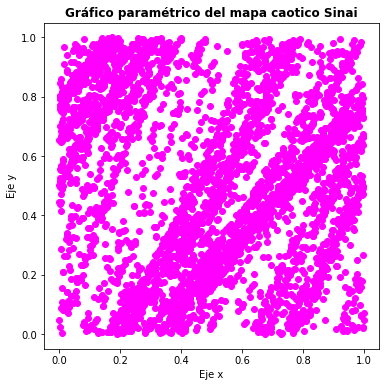

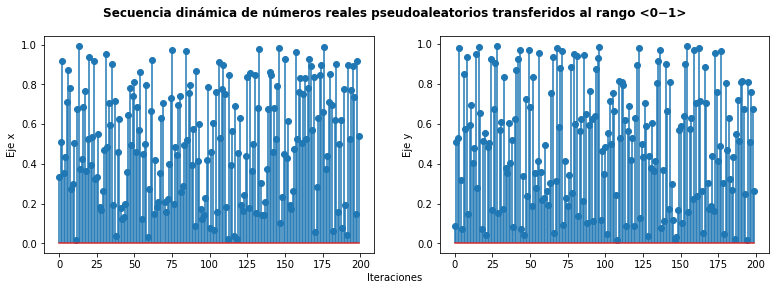

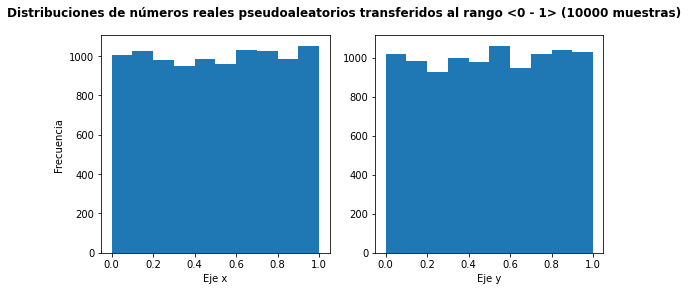

In [ ]:
"""
Program to plot Sinai map
"""

delta = 0.1 
def Sinai(X,Y,delta = 0.1):
  Xap = (X + Y + delta* np.cos(2*np.pi*Y))%(1)
  Yap = (X + 2*Y)%(1)
  return Xap, Yap
x,y=plot_map(Sinai,10000)
fig = plt.figure(figsize=(6,6))
plt.scatter(x[-4000:],y[-4000:],c='magenta')  
plt.title("Gráfico paramétrico del mapa caotico Sinai", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.stem(x_norm[-200:], use_line_collection=True)
plt.ylabel('Eje x')
plt.subplot(122)
plt.stem(y_norm[-200:], use_line_collection=True)
plt.ylabel('Eje y')
fig.text(0.5, 0.04, 'Iteraciones', ha='center', va='center')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El mapa Sinai es muy similar en sus características al mapa Arnold's Cat, pues todo lo bueno que se dijo de el aplica al mapa Sinai.

### 5.6 Mapa Burgers

$X_{n+1} = a X_{n} - Y_{n}^2$

$Y_{n+1} = b Y_{n} + X_{n} Y_{n}$

Se simula con el parametro de $a$ = 0.75 y $b$ = 1.75.

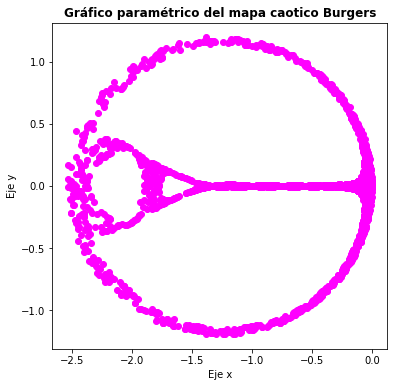

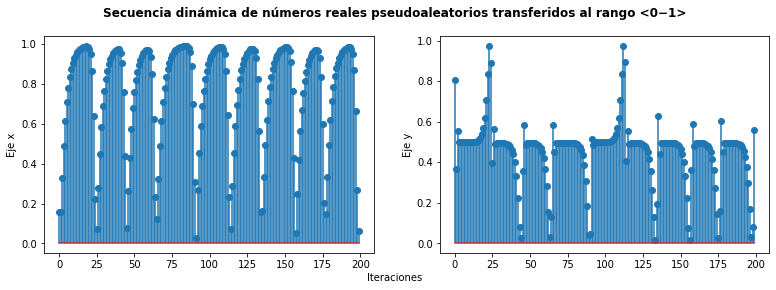

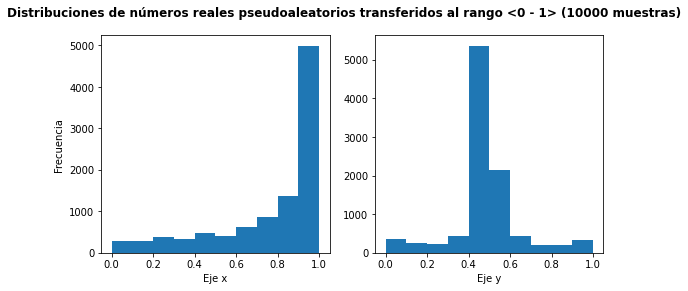

In [ ]:
"""
Program to plot Burgers map
"""

a = 0.75
b = 1.75
def Burgers(X,Y,a = 0.75,b = 1.75):
  Xap = a*X - Y**2
  Yap = b*Y + X*Y
  return Xap, Yap
x,y=plot_map(Burgers,10000)
fig = plt.figure(figsize=(6,6))
plt.scatter(x[-4000:],y[-4000:],c='magenta')  
plt.title("Gráfico paramétrico del mapa caotico Burgers", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.stem(x_norm[-200:], use_line_collection=True)
plt.ylabel('Eje x')
plt.subplot(122)
plt.stem(y_norm[-200:], use_line_collection=True)
plt.ylabel('Eje y')
fig.text(0.5, 0.04, 'Iteraciones', ha='center', va='center')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El mapa Burgers es bastante atractivo a la vista pero carece de lo mismo que el mapa Lozi en cuanto a si posible aplicación al mapeo en el espacio búsqueda, sin embargo sus distribuciones solo destacan por lo peculiar que son haciendo difícil su usabilidad.

### 5.7 Mapa Tinkerbell

$X_{n+1} = X_{n}^2 - Y_{n}^2 + a X_{n} + b Y_{n}$

$Y_{n+1} = 2 X_{n} Y_{n} + c X_{n} + d Y_{n}$

Se simula con el parametro de $a$ = 0.9, $b$ = - 0.6, $c$ = 2 y $d$ = 0.5.

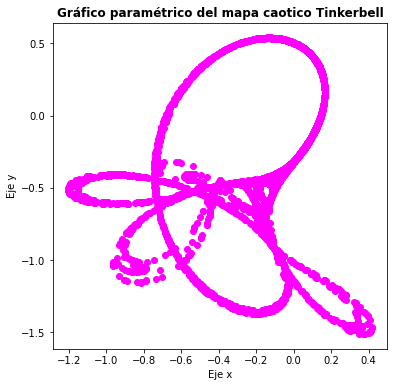

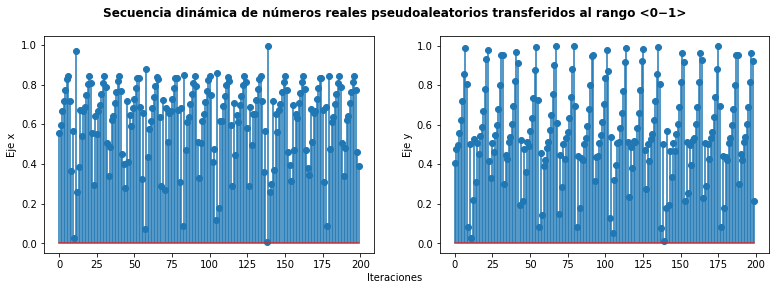

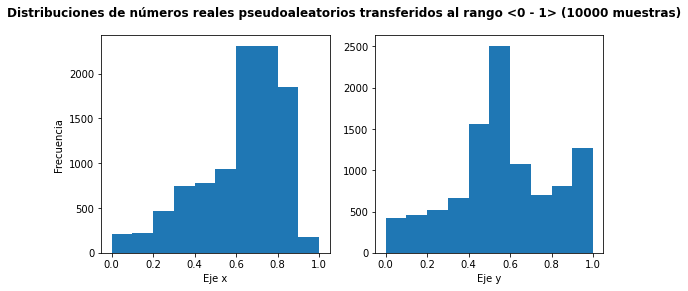

In [ ]:
"""
Program to plot Tinkerbell map
"""

a = 0.9
b = -0.6
c = 2
d = 0.5
def Tinkerbell(X,Y,a = 0.9,b = -0.6,c = 2,d = 0.5):
  Xap = X**2 - Y**2 + a*X + b*Y
  Yap = 2*X*Y + c*X + d*Y
  return Xap, Yap
x,y=plot_map(Tinkerbell,10000)
fig = plt.figure(figsize=(6,6))
plt.scatter(x[-4000:],y[-4000:],c='magenta')  
plt.title("Gráfico paramétrico del mapa caotico Tinkerbell", fontweight ="bold")
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.show()
# figures time norm
x_norm = (x -x.min())/(x.max()-x.min())
y_norm = (y -y.min())/(y.max()-y.min())
fig = plt.figure(figsize=(13,4))
plt.subplot(121)
plt.stem(x_norm[-200:], use_line_collection=True)
plt.ylabel('Eje x')
plt.subplot(122)
plt.stem(y_norm[-200:], use_line_collection=True)
plt.ylabel('Eje y')
fig.text(0.5, 0.04, 'Iteraciones', ha='center', va='center')
plt.suptitle("Secuencia dinámica de números reales pseudoaleatorios transferidos al rango <0−1>", fontweight ="bold")
plt.show()
# figure
fig = plt.figure(figsize=(9,4))
plt.subplot(121)
plt.hist(x_norm)
plt.xlabel('Eje x')
plt.subplot(122)
plt.hist(y_norm)
plt.xlabel('Eje y')
fig.text(0.06, 0.5, 'Frecuencia', ha='center', va='center', rotation='vertical')
plt.suptitle("Distribuciones de números reales pseudoaleatorios transferidos al rango <0 - 1> (10000 muestras)", fontweight ="bold")
plt.show()

El mapa Tinkerbell es otro mapa Burgers, estéticamente muy llamativo pero insuficiente al plantearlo como opción al mapeo de espacio de búsqueda. a pesar de que las distribuciones del mapa Tinkerbell tienen una tendencia mas normal que las del mapa Burgers siguen siendo peculiares lo cual limita sus posibles aplicaciones.

# 6. Discusión

• Las distribuciones de números aleatorios generados a partir de los sistemas en tiempo continuo son muy similares a diferencia de las distribuciones de números aleatorios generados desde los mapas discretos, ya que estas son más diversas.

• Al analizar el comportamiento de los sistemas continuos de tiempo, los mapas discretos y compararlos los sistemas continuos en el tiempo, no son tan buenos. Puesto que en el mapeo de esos sistemas al espacio de búsqueda conducirá solo a cubrir un área limitada, donde el atractor caótico se está moviendo. Sin embargo, los osciladores muestran una mejor cobertura del espacio. En contra parte de los sistemas continuos en el tiempo, los mapas discretos destacan en cuanto a un alto potencial para las técnicas de mapeo o de búsqueda local.

• "Aunque la cobertura del espacio de búsqueda es menor (mapa de Ikeda) o muy limitada (mapa de Lozi, mapa de Burgers y mapa de Tinkerbell), estos dos mapas caóticos se pueden combinar dentro de algún mapeo multidimensional híbrido"(Este punto la discusión la saque textualmente el archivo [1] dado que la considero interesante y le añadí referencia a unos mapas añadidos en este documento que considero que se acogen al problema mencionado.)


# 7. Conclusión

Los mapas caóticos muestran aplicabilidad, pero no se descarta el seguir explorando diferentes estados caóticos de los sistemas en tiempo continuo aquí estudiados. Además, los sistemas caóticos cuentan con una forma de simular más compleja que los mapas caóticos. Por tanto, estos segundos son una opción más rápida, simple y con mayor variedad.

Como se mencionó anteriormente, existe la posibilidad de explorar los cambios de las distribuciones de la generación de números aleatorios, para ponerlos en otras secciones que tengan caos en el mismo sistema continuo.




# Referencias 

[1] SENKERIK, R., ZELINKA, I. and PLUHACEK M., "Chaos-Based Optimization-A Review.", J. Adv. Eng. Comput., vol. 1.1, pp. 68-79, 2017.

[2] CELIKOVSKY, S. and I. ZELINKA., "Chaos Theory for Evolutionary Algorithms Researchers", in I. Zelinka, S. Celikovsky, H. Richter, G. Chen, Editors, Evolutionary Algorithms and Chaotic Systems, Springer, pp. 89-143, 2010.

[3] LEE, J. S. and K. S. CHANG., "Applications of chaos and fractals in process systems engineering", Journal of Process Control, vol. 6, no. 203, pp. 71-87, 1996

[4] WU J., J. LU and J. WANG., "Application of chaos and fractal models to water quality time series prediction", Environmental Modelling & Software, vol. 24, no. 5, pp. 632-636, 2009.

[5] PERSOHN, K. J. and R. J. POVINELLI., "Analyzing logistic map pseudorandom number generators for periodicity induced by finite precision floating-point representation", Chaos, Solitons & Fractals, vol. 45, no. 3, pp. 238-245, 2012.

[6] SPROTT, J. C., "Chaos and Time-Series Analysis", Oxford University Press, 2003.

# Optimización del enjambre de partículas

https://sci-hub.se/https://www.sciencedirect.com/science/article/abs/pii/S2210650215000838?via%3Dihub

https://sci-hub.se/https://www.sciencedirect.com/science/article/abs/pii/S096007790700803X

Este artículo contine un enfoque introduciendo mapas caóticos con ergodicidad, irregularidad y propiedad estocástica en PSO para mejorar la convergencia global escapando de las soluciones locales. El uso de secuencias caóticas en PSO puede ser útil para escapar más fácilmente de los mínimos locales que lo que se puede hacer a través del PSO tradicional.
Cuando el algoritmo PSO clásico necesita un número aleatorio, se genera iterando un paso del mapa caótico elegido que se ha iniciado a partir de una condición inicial aleatoria en la primera iteración del PSO.


#Implementación de CPRNG

Los CPRNG basados ​​en seis mapas caóticos se emplean para generar los números pseudoaleatorios Rand1 y Rand2.
En el caso de un mapa caótico discreto bidimensional como secuencia de salida, se puede utilizar la secuencia de valores x o y dada por el par de ecuaciones que definen el mapa caótico.
En este trabajo se utilizó el valor de la ecuación X. Las ecuaciones se iteraron 50.000 veces desde un punto de partida aleatorio y se registraron los valores generados por la ecuación X. Esta secuencia grabada de 50.000 números se utilizó luego como fuente de números pseudoaleatorios para el PSO. Cuando la secuencia se agotó, se generó una nueva secuencia a partir de un nuevo punto de partida aleatorio.

# PSO

El algoritmo PSO original fue propuesto en 1995 por Eberhart
y Kennedy [?]. inspirados en el comportamiento de enjambre natural de los peces y pájaros. Cada partícula en el enjambre se define por "posición", que representa la combinación de los parámetros de la función de costo (CF) y la "velocidad". La nueva posición de la partícula en la siguiente La iteración se obtiene luego como una suma de la posición y la velocidad reales.

El cálculo de la velocidad sigue dos tendencias naturales de la
partícula: moverse a la mejor solución particular encontrada hasta ahora por la 
partícula (conocida en la literatura como mejor personal: pBest o mejor local: lBest). Y para pasar a la mejor solución general que se encuentra en el swarm o sub-swarm definido (conocido como mejor global: gBest).

En el PSO original, la nueva posición de la partícula es alterada por la
velocidad dada por (1):

$ v_{ij}^{t+1} = w_{t} \times w_{ij}^{t}+c_{1} \times Rand_{1} \times (pBest_{ij}-x_{ij}^{t}) + c_{2} \times Rand_{2} \times (gBest_{j}-x_{ij}^{t})$(1)

donde:

$v_{ij}^{t+1}$ - Nueva velocidad de la i-ésima partícula en la iteración t+1
(componente j de la dimensión D).

$w_{t}$ - Valor de peso de inercia en la iteración t.

$v_{ij}^{t}$ - Velocidad actual de la i-ésima partícula (componente j de la
dimensión D) en la iteración t.

$c_{1}, c_{2}$: factores de prioridad (establecidos en los valores típicos $c_{1}=c_{2}=2$).

pBesti - Mejor solución local (personal) encontrada por la partícula i-ésima.

gBest: la mejor solución encontrada en una población.

$x_{ij}^{t}$ - Posición actual de la i-ésima partícula (componente j del
dimensión D) en la iteración t.

$Rand_{1}, Rand_{2}$ - Números pseudoaleatorios, intervalo (0, 1) - en este
estudio generado por CPRNG. Se genera un nuevo par de $Rand_{1} y Rand_{2}$ para cada dimensión.

La velocidad máxima de las partículas en el PSO se limita típicamente a 0,2 veces el rango del problema de optimización y este patrón se siguió en este estudio. La nueva posición de una partícula es
luego dado por (2), donde $x_{i}^{t+1}$ es la nueva posición de la partícula:

$x_{i}^{t+1} = x_{t}^{t} + v_{t}^{t+1}$(2)

En el diseño de PSO, el peso de inercia $w$ se utiliza para ralentizar las partículas a lo largo del tiempo para mejorar la capacidad de búsqueda local en la última fase de la optimización. A lo largo del tiempo se desarrollaron varios enfoques diferentes para el peso por inercia [?]. El peso de inercia lineal decreciente [?] se utiliza aquí en el PSO. El peso de inercia tiene dos parámetros de control $w_{start}$ y $w_{end}$. (3) da una nueva w para cada iteración, donde t representa el número de iteración actual yn representa el número total de iteraciones. Los valores utilizados para el PSO en este estudio fueron $w_{start}=0.9$ y $w_{end}=0.4$.

$w = w_{start} - \frac{((w_{start} - w_{end}) \times t)}{n}$(3)

# Code PSO
## https://github.com/JorgeJPL/PSO-Python/blob/6d1aea0d5573dc146b6bb9de7ced215af3b3d171/PSOv3.py#L79

## https://github.com/TomRSavage/Particle-Swarm/blob/b5f579950b39f6ff16fb1f8e36239cbbd498b068/ParticleSwarmUtility.py#L15




Generacion: 1 - - - Gbest: [[-0.76389116  1.24494807]]
Generacion: 2 - - - Gbest: [[-0.66422058  0.20677148]]
Generacion: 3 - - - Gbest: [[-0.35209692  0.0773458 ]]
Generacion: 4 - - - Gbest: [[0.60900572 0.4365634 ]]
Generacion: 5 - - - Gbest: [[0.66150494 0.40094627]]
Generacion: 6 - - - Gbest: [[0.6914839 0.4840386]]
Generacion: 7 - - - Gbest: [[0.73555961 0.53411705]]
Generacion: 8 - - - Gbest: [[0.73555961 0.53411705]]
Generacion: 9 - - - Gbest: [[0.73758009 0.54402888]]
Generacion: 10 - - - Gbest: [[0.7382944  0.54510404]]
Generacion: 11 - - - Gbest: [[0.76252059 0.58278264]]
Generacion: 12 - - - Gbest: [[0.77957608 0.60324706]]
Generacion: 13 - - - Gbest: [[0.77957608 0.60324706]]
Generacion: 14 - - - Gbest: [[0.7795757  0.60324715]]
Generacion: 15 - - - Gbest: [[0.7795757  0.60324715]]
Generacion: 16 - - - Gbest: [[0.7786842  0.60481725]]
Generacion: 17 - - - Gbest: [[0.77980447 0.60833923]]
Generacion: 18 - - - Gbest: [[0.78108301 0.60983727]]
Generacion: 19 - - - Gbest: [[0.7

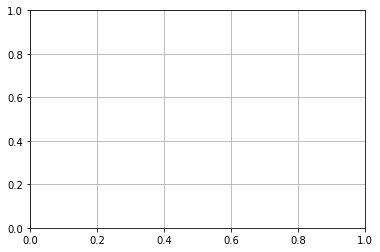

In [ ]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

def Vector_Velocidad(n, a, Pbest, Gbest, v):
    for i in range(n):
        #Velocidad en X
        R1,R2 = plot_map(Sinai,1)
        v[0][i] = 0.7 * v[0][i] + (Pbest[0][i] - a[0][i]) * R1 * 1.47 + (Gbest[0][0] - a[0][i]) * R2 * 1.47
        a[0][i] = a[0][i] + v[0][i]
        #Velocidad en Y
        R1,R2 = plot_map(Sinai,1)
        v[1][i] = 0.7 * v[1][i] + (Pbest[1][i] - a[1][i]) * R1 * 1.47 + (Gbest[0][1] - a[1][i]) * R2 * 1.47
        a[1][i] = a[1][i] + v[1][i]

def fitness(x, y):
        return 100 * ((y - (x**2))**2) + ((1 - (x**2))**2)
        #100 * ((y - (x**2))**2) + ((1 - (x**2))**2)


#Variables
n = 40
num_variables = 2

#Crear arreglos
a = np.empty((num_variables, n))
v = np.empty((num_variables, n))
Pbest = np.empty((num_variables, n))
Gbest = np.empty((1, 2))
r = np.empty((n))

#Llenar arreglos
for i in range(0, num_variables):
    for j in range(0, n):
        Pbest[i][j] = rand.randint(-20, 20)
        a[i][j] = Pbest[i][j]
        v[i][j] = 0

#Llenar r
for i in range(0, n):
    r[i] = fitness(a[0][i], a[1][i])

#Ordenar elementos de Pbest
#Ordenamiento_Burbuja(Pbest, r, n)

Gbest[0][0] = Pbest[0][0]
Gbest[0][1] = Pbest[1][0]

generation = 0

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)

while (generation < 1000):
    for i in range(n):
        #Obtener Pbest
        if(fitness(a[0][i], a[1][i]) < fitness(Pbest[0][i], Pbest[1][i])):
            Pbest[0][i] = a[0][i]
            Pbest[1][i] = a[1][i]
        #Obtener Gbest
        if(fitness(Pbest[0][i], Pbest[1][i]) < fitness(Gbest[0][0], Gbest[0][1])):
            Gbest[0][0] = Pbest[0][i]
            Gbest[0][1] = Pbest[1][i]
        #Calcular Velocidad
        Vector_Velocidad(n, a, Pbest, Gbest, v)
    generation = generation + 1
    print('Generacion: ' + str(generation) + ' - - - Gbest: ' +str(Gbest))

    line1 = ax.plot(a[0], a[1], 'r+')
    line2 = ax.plot(Gbest[0][0], Gbest[0][1], 'g*')

    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    
    fig.canvas.draw()

    ax.clear()
    ax.grid(True)

print('Gbest: ')
print(Gbest)

